# The Homoscedasticity Assumption 

## Group: 5 
## Class: DSF - PT12 Data Gurus

## Objectives
###    1) Describe the homoscedasticity assumption of linear regression
###    2) Identify problems with homoscedasticity using plots and tests

## Definition of Terms

###   i) Homoscedasticity / Homoskedasticity (Equal Variance)
###    - The variance of the error terms (residuals) is constant across all values of the independent variable(s)
###   ii) Heteroscedasticity/ heteroskedasticity (Unequal Variance)
###    - The variance of the error terms (residuals) is not constant across values of the independent variable(s)
###   iii) Target (y) - What we are trying to predict
###   iv) Feature (x) - Input variable that we use to predict the target
###   v) Residual - The error between what the model predicts and the actual value = actual Value − predicted Value

In [135]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt # It checks whether the variance of residuals changes across the range of the predictor(s)
from statsmodels.stats.diagnostic import het_breuschpagan

# Visualizing error Variance
## 1.Feature vs Target (Simple Regression only)
###    - Works only when you have one feature.
###    - Plot feature (X) on x-axis and target (Y) on y-axis.
###    - If the lines are parallel to the trend line, it indicates homoscedasticity; if they are cone-shaped, it suggests heteroscedasticity.

### Plot 1: Homoscedastic (Even Scatter)

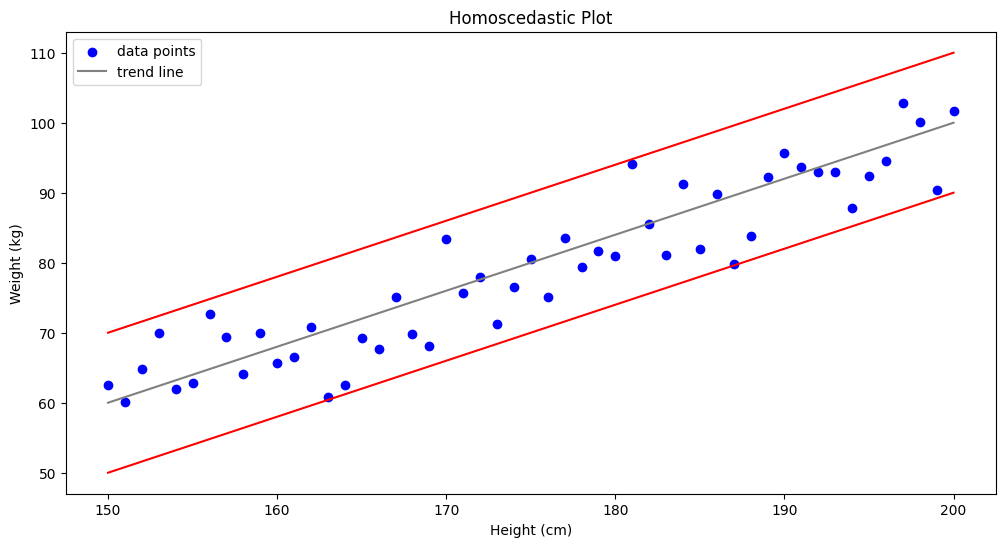

In [136]:
# Generate random variables. Should not below 42 
np.random.seed(42)

# Generate heights with constant noise (homoscedastic)
# Create a list of heights from 150 cm to 200 cm, increasing by 1 cm each step.
heights = np.arange(150, 201, 1)
# sets the amount of randomness added to each weight as 5
noise_scale = 5                            
## Generate weights with constant noise (homoscedastic)
# The equation 0.8*height - 60 is the linear regression equation
# np.random.normal(0, noise_scale, size=len(heights)) generates random values from a normal distribution with mean 0 and standard deviation 1
weights = 0.8 * heights - 60 + np.random.normal(0, noise_scale, size=len(heights))


# Constant-variance lines (~99% of points)
# Linear trend without noise
trend_line = 0.8 * heights - 60    
top_line = trend_line + 2*noise_scale
bottom_line = trend_line - 2*noise_scale

# Plot data and lines
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(heights, weights, color="blue", label="data points")
ax.plot(heights, trend_line, color="gray", label="trend line")
ax.plot(heights, top_line, color="red")
ax.plot(heights, bottom_line, color="red")

# Labels and title
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.set_title("Homoscedastic Plot")
ax.legend()



### Plot 2: Heteroscedastic 

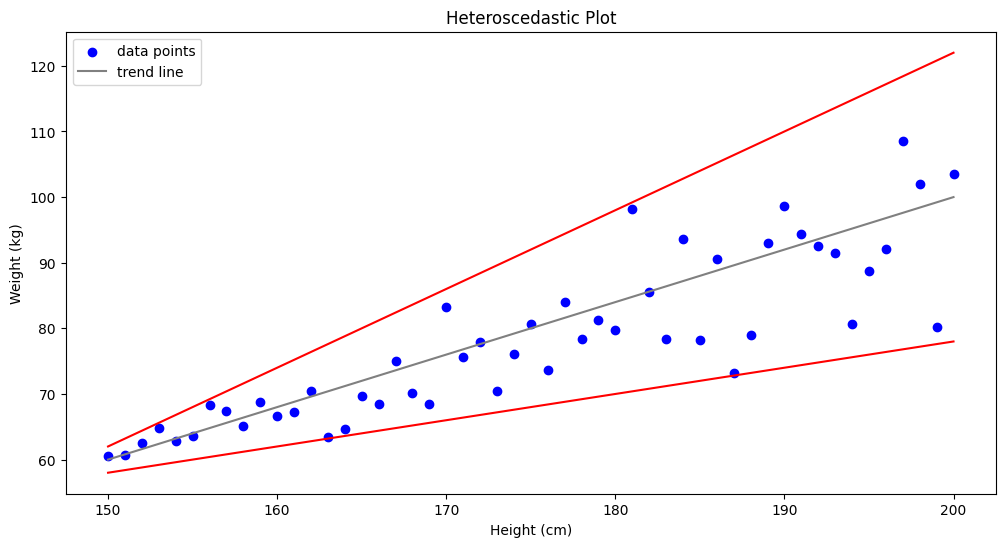

In [137]:
np.random.seed(42)  # Make results reproducible

# Generate heights with increasing noise (heteroscedastic)
# Create a list of heights from 150 cm to 200 cm, increasing by 1 cm each step
heights = np.arange(150, 201, 1)
# Noise increases with height: starts small at 150 cm and grows as height increases
noise_scale = 1 + 0.2*(heights - 150)
# Generate weights with heteroscedastic noise
# 0.8*height - 60 is the linear trend, np.random.normal(0, noise_scale) adds noise
weights = 0.8 * heights - 60 + np.random.normal(0, noise_scale)

# Cone lines capturing ~99% of points
trend_line = 0.8 * heights - 60 #Linear trend without noise
top_line = trend_line + 2*noise_scale
bottom_line = trend_line - 2*noise_scale

# Plot data and lines
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(heights, weights, color="blue", label="data points")
ax.plot(heights, trend_line, color="gray", label="trend line")
ax.plot(heights, top_line, color="red")
ax.plot(heights, bottom_line, color="red")

# Labels and title
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.set_title("Heteroscedastic Plot")
ax.legend()
plt.show()


## 2. Residuals Plot (Simple or Multiple Regression)

###    i)   Used when there are multiple features.
###    ii)  Plot predicted on x_axis and residual on y_axis 
###    iii) Rather than verifying if the lines are parallel to the best-fit line, we need to determine if they are horizontal. If the red lines are horizontal, it indicates homoscedasticity; if they are not, it suggests heteroscedasticity.


### Plot 1: Homoscedastic (Even Scatter) 

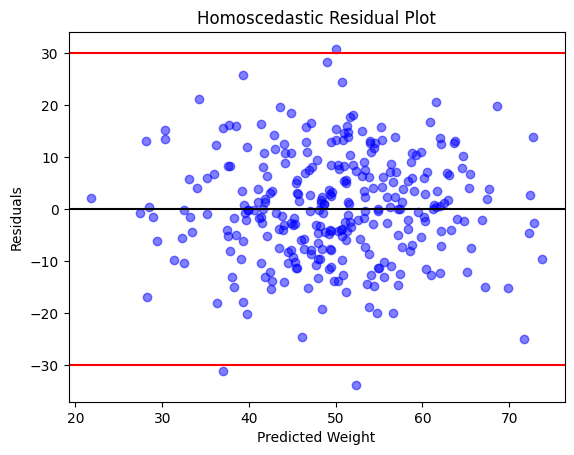

In [138]:
# Sets the amount of random noise we add to the data
scale = 10
# make_regression generates fake regression data.
# n_samples=300 → 300 data points.
# n_features=1 → only 1 input feature (like one independent variable).
# coef=True → also return the slope (coefficient) of the underlying linear relationship.
# noise=scale → adds normally distributed noise (randomness) to the target variable y.
# random_state=8 → ensures we get the same random numbers every time we run the code.

height_generated, weight_generated, coef = make_regression(
    n_samples=300, n_features=1, coef=True, noise=scale, random_state=8
)

# Shift the target variable
weight_generated += 50

# Fit line based on the underlying coefficient
fit_line_generated = coef * height_generated.flatten() + 50

# Residuals = actual - predicted
resids_generated = weight_generated - fit_line_generated

# Create scatter plot of residuals
fig, ax = plt.subplots()
ax.scatter(fit_line_generated, resids_generated, color="blue", alpha=0.5)

# Plot horizontal lines to show spread
ax.axhline(y=0, color="black")
ax.axhline(y=scale*3, color="red")  
ax.axhline(y=-scale*3, color="red") 

# Labels and title
ax.set_xlabel("Predicted Weight")
ax.set_ylabel("Residuals")
ax.set_title("Homoscedastic Residual Plot")
plt.show()

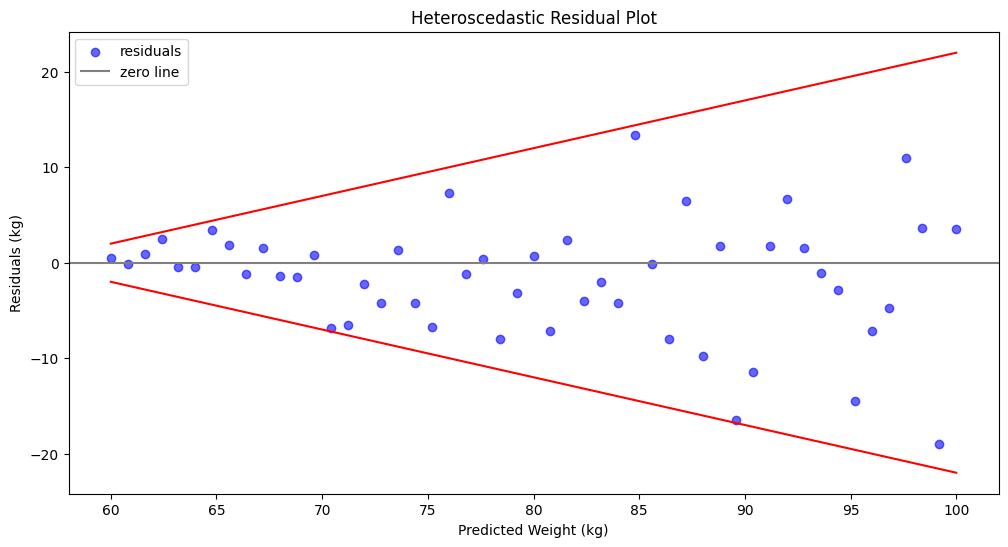

In [139]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # Make results reproducible

# Generate heights with increasing noise (heteroscedastic)
heights = np.arange(150, 201, 1)
noise_scale = 1 + 0.2*(heights - 150)        # Noise grows with height
weights = 0.8 * heights - 60 + np.random.normal(0, noise_scale)

# Predicted trend line without noise
trend_line = 0.8 * heights - 60

# Residuals = actual - predicted
residuals = weights - trend_line

# Cone lines capturing ~99% of residuals
top_line = 2*noise_scale
bottom_line = -2*noise_scale

# Plot residuals
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(trend_line, residuals, color="blue", alpha=0.6, label="residuals")
ax.axhline(0, color="gray", label="zero line")
ax.plot(trend_line, top_line, color="red")
ax.plot(trend_line, bottom_line, color="red")

# Labels and title
ax.set_xlabel("Predicted Weight (kg)")
ax.set_ylabel("Residuals (kg)")
ax.set_title("Heteroscedastic Residual Plot")
ax.legend()
plt.show()


# Statistical Testing for Homoscedasticity
### There are several statistical tests available to test Homoscedasticity, including:
##    1) Goldfeld-Quandt Test
###         i) Divide your dataset into two groups (usually by the size of the predictor).
###        ii) Calculate the Mean Squared Error (MSE) of residuals for each group.
###       iii) Compute the ratio: MSE of second group ÷ MSE of first group
###        iv) Compare this ratio to the F-distribution to get a p-value
***

### Perform Goldfeld-Quandt Test: Homoscedastic (Even Scatter)

###             H₀: Residuals have equal variance (homoscedastic)
###             H₁: Residual has no equal variance (heteroscedastic)


In [140]:
# reshape(-1, 1) turns your 1D feature array into a 2D array (one column, many rows)
height_generated2 = height_generated.reshape(-1, 1)

# Run Goldfeld-Quandt test
test_stat, p_value, _ = het_goldfeldquandt(weight_generated, height_generated2, alternative='two-sided')

# Print results
print("Test statistic:", test_stat)
print("p-value:", p_value)


Test statistic: 1.064941143291257
p-value: 0.7014676435876873


### Conclusion: 

### >>> p = 0.701 > 0.05, so fail to reject H₀.
### >>> This means there’s no evidence of heteroscedasticity. 
### >>> The residuals’ variance appears roughly constant across the data.

***
### Perform Goldfeld-Quandt Test: heteroscedasticity (uneven Scatter)
### H₀: Residuals have equal variance (homoscedastic)
### H₁: Residual has no equal variance (heteroscedastic)

In [141]:
data = pd.read_csv(r"C:\Users\elizabeth.gichure\Downloads\auto-mpg.csv")
y_mpg = data["mpg"]
x_mpg = data["acceleration"]
# Perform Goldfeld-Quandt test
test_stat, p_value, _ = het_goldfeldquandt(y_mpg, x_mpg.values.reshape(-1,1), alternative='two-sided')

# Print the results
print("Test statistic:", test_stat)
print("p-value:", p_value)


Test statistic: 2.423945504791773
p-value: 1.22044607975262e-09


### p ≈ 1.22e-09 < 0.05, so reject H₀.
### This means there is strong evidence of heteroscedasticity.
### The residuals’ variance is not constant across your data.

##     2) Breusch-Pagan Test
###         i) It’s based on the Lagrange multiplier test..
###        ii) It basically asks: Can I predict the size of the residuals using my independent variables? If yes, the variance is not constant, meaning it is heteroscedastic and vice versa

### Perform Breusch-Pagan Test: Homoscedastic (Even Scatter)

###             H₀: Residuals have equal variance (homoscedastic)
###             H₁: Residual has no equal variance (heteroscedastic)

In [142]:
# Creates an Ordinary Least Squares (OLS) regression model
# adds an intercept term (the constant) to the model.
# fits the regression model to your data.
# extracts the residuals (differences between actual and predicted values)
het_breuschpagan(sm.OLS(weight_generated, sm.add_constant(height_generated)).fit().resid, sm.add_constant(x_generated))
print("Lagrange multiplier statistic:", 0.1957)
print("LM p-value:", 0.6582)
print("Breusch-Pagan statistic:", 0.1945)
print("BP p-value:", 0.6595)

Lagrange multiplier statistic: 0.1957
LM p-value: 0.6582
Breusch-Pagan statistic: 0.1945
BP p-value: 0.6595


### BP p-value = 0.6595 > 0.05
### Fail to reject H₀
### Residuals’ variance appears roughly constant
### No evidence of heteroscedasticity in your data

### Perform Breusch-Pagan Test: Homoscedastic (Even Scatter)
### H₀: Residuals have equal variance (homoscedastic)
### H₁: Residual has no equal variance (heteroscedastic)

In [143]:
# Fit OLS model using statsmodels
model = sm.OLS(y_mpg, sm.add_constant(x_mpg))
results = model.fit()  # No arguments needed here; X and y are in OLS already

# Get residuals
residuals = results.resid

# Run Breusch-Pagan test
bp_test = het_breuschpagan(residuals, sm.add_constant(x_mpg))

# Named outputs
lm_stat, lm_pvalue, bp_stat, bp_pvalue = bp_test

# Print results
print("Lagrange multiplier statistic:", lm_stat)
print("LM p-value:", lm_pvalue)
print("Breusch-Pagan statistic:", bp_stat)
print("BP p-value:", bp_pvalue)


Lagrange multiplier statistic: 6.023194926772562
LM p-value: 0.01411906428548805
Breusch-Pagan statistic: 6.08597716382371
BP p-value: 0.014054760063762762


### BP p-value = 0.0141 < 0.05
### Reject H₀
### Residuals’ variance is not constant
### Evidence of heteroscedasticity in your dataa